In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [3]:
df=pd.read_csv("train_v9rqX0R (1).csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* There are 5 numerical columns and 7 categorical columns
* Item weight and Outlet size have missing values 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


* Item visibility have zeros 
* Item visibility and Item Outlet Sales have outliers 


In [36]:
def uni(df,r,c):
    it=1
    col=df.select_dtypes(np.number).columns
    plt.figure(figsize=(10,8))
    for i in col:
        plt.subplot(r,c,it)
        sns.distplot(df[i],color="purple")
        plt.title(f"Mean : {round(df[i].mean(),2)} skew : {round(df[i].skew(),2)} kurt : {round(df[i].kurt(),2)}")
        it+=1
    plt.tight_layout()
    plt.show()

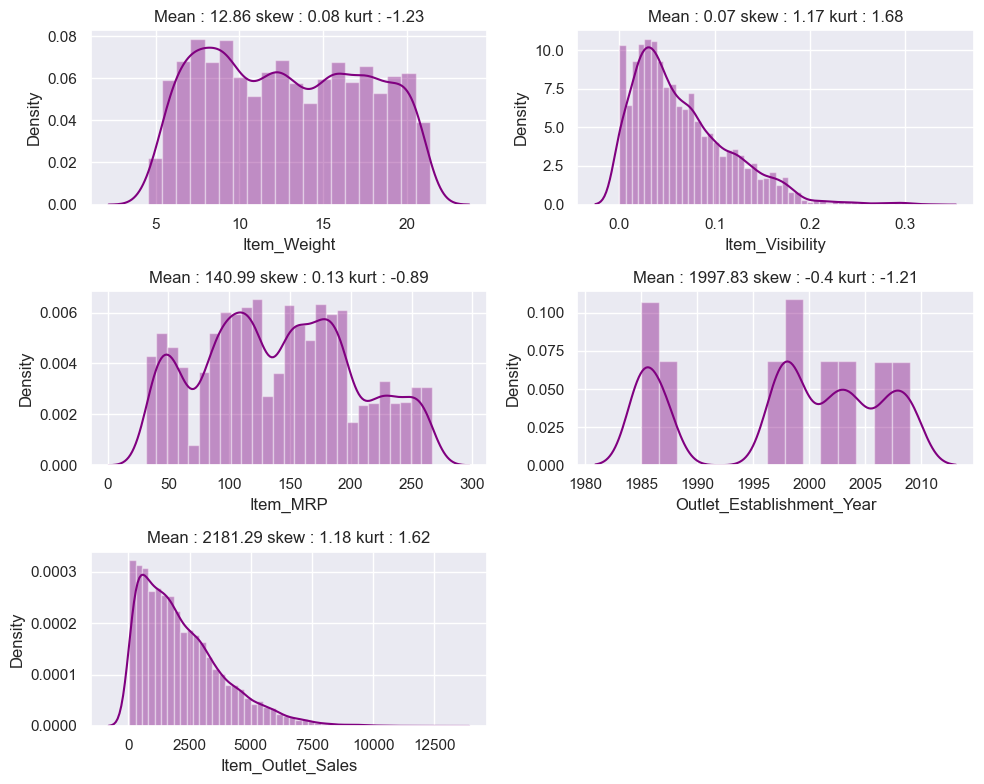

In [38]:
uni(df,3,2)

* Item Mrp is a multimodal 
* 

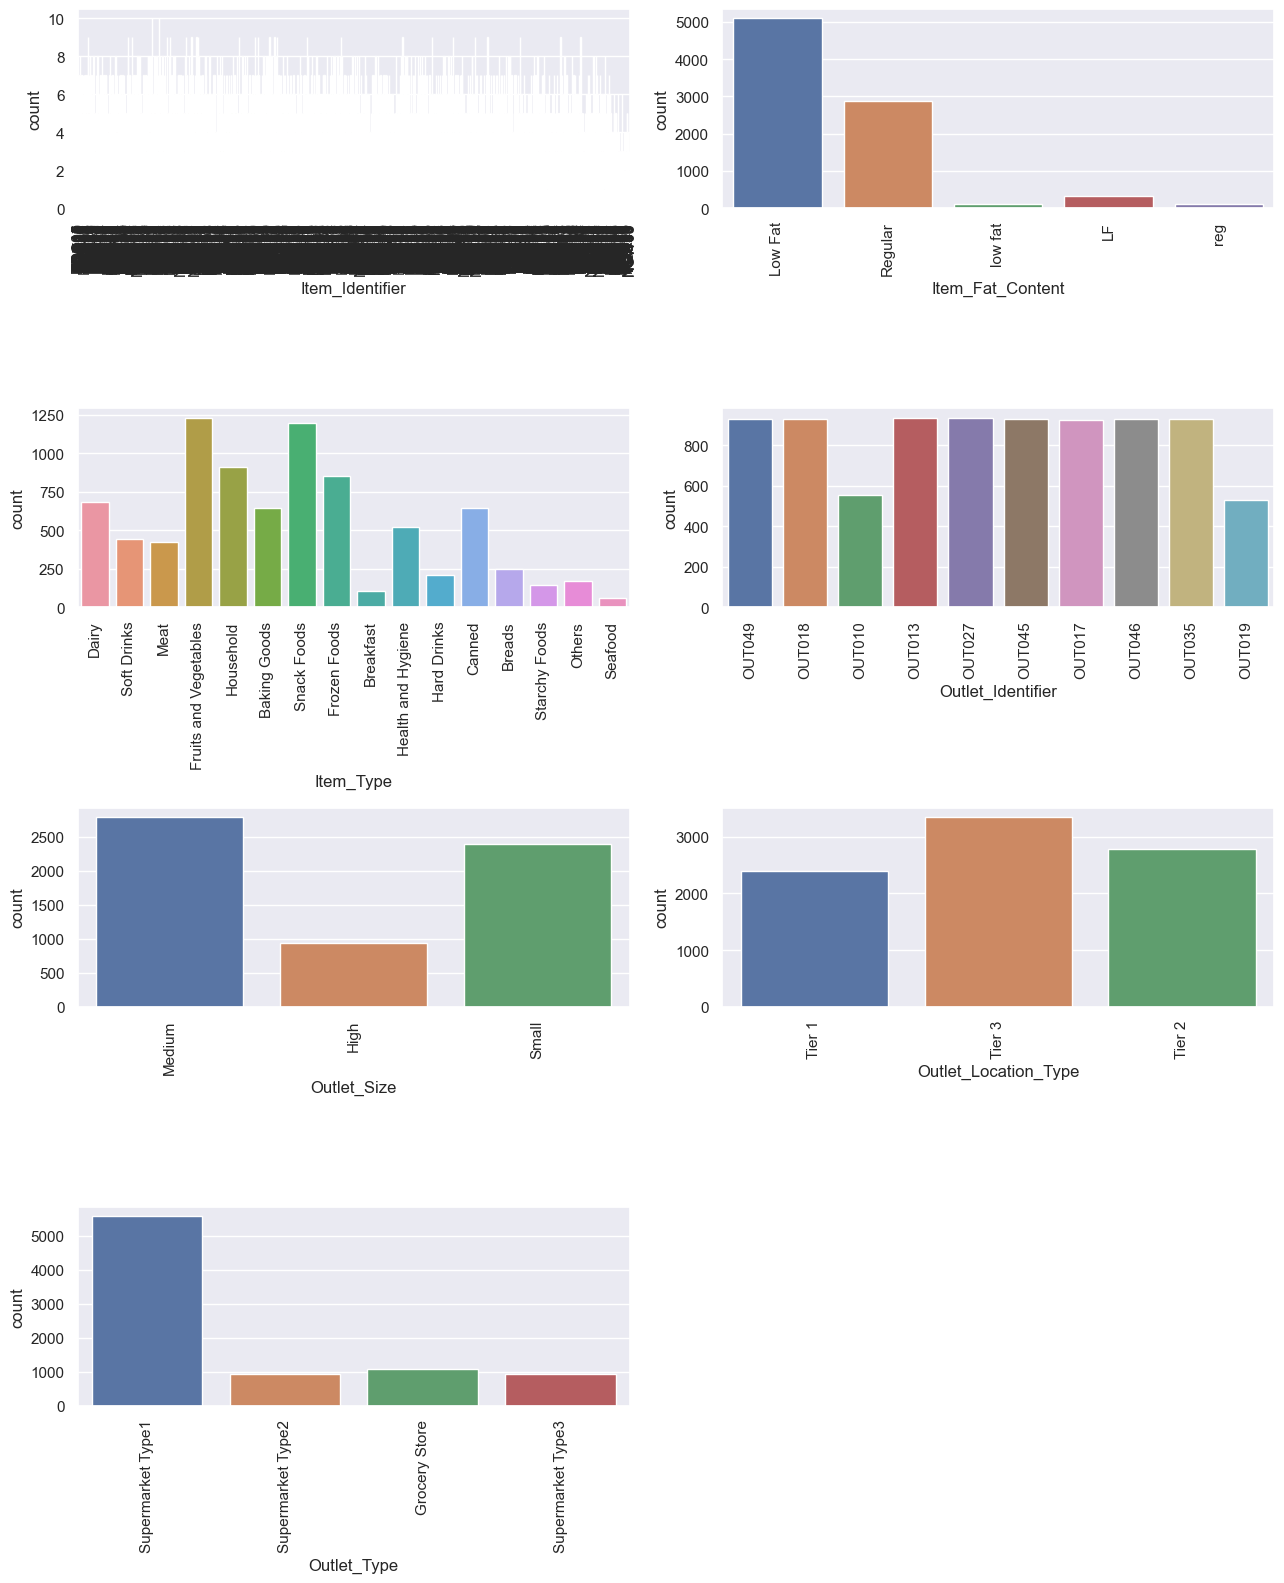

In [49]:
it=1
plt.figure(figsize=(13,16))
for i in df.select_dtypes("object").columns:
    plt.subplot(4,2,it)
    sns.countplot(x=df[i])
    it+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [50]:
#Missing Values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [54]:
df.loc[:,["Item_Identifier","Item_Weight"]][df["Item_Identifier"]=="FDA15"]
#Since the item weight has same weight for the all item_identifier 
#we can fill the missing values in item_weight based on item id

,Item_Identifier,Item_Weight
0,FDA15,9.3
831,FDA15,9.3
2599,FDA15,9.3
2643,FDA15,9.3
4874,FDA15,9.3
5413,FDA15,9.3
6696,FDA15,NaN
7543,FDA15,9.3


In [57]:
df["Item_Weight"]=df.groupby("Item_Identifier")["Item_Weight"].transform(lambda x : x.fillna(x.median()))

In [58]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [59]:

df[df["Item_Weight"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [68]:
df["Item_Weight"][927]=12.85

In [67]:
df["Item_Weight"][df["Item_Type"]=='Frozen Foods'].median()

12.85

In [70]:
df["Item_Weight"][1922]=13.15

In [69]:
df["Item_Weight"][df["Item_Type"]=='Snack Foods'].median()

13.15

In [72]:
df["Item_Weight"][4187]=13.35

In [73]:
df["Item_Weight"][df["Item_Type"]=='Dairy'].median()

13.35

In [75]:
df["Item_Weight"][5022]=11.65

In [74]:
df["Item_Weight"][df["Item_Type"]=='Baking Goods'].median()

11.65

In [76]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [79]:
df.iloc[:,-6:]

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...
8518,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [104]:
df["Outlet_Size"][df["Outlet_Location_Type"]=="Tier 3"].unique()


array(['Medium', nan, 'High'], dtype=object)

In [106]:
df["Outlet_Size"][df["Outlet_Location_Type"]=="Tier 2"].unique()


array([nan, 'Small'], dtype=object)

In [107]:
df["Outlet_Size"][df["Outlet_Location_Type"]=="Tier 1"].unique()


array(['Medium', 'Small'], dtype=object)

In [113]:
df["Outlet_Size"]=df.groupby("Outlet_Location_Type")["Outlet_Size"].transform(lambda x : x.fillna(x.mode()[0]))

In [111]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [115]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
